In [0]:
%ls

datalab/  models/


In [0]:
!pip install --upgrade tensorflow

    100% |████████████████████████████████| 83.1MB 307kB/s 
  Found existing installation: tensorflow 1.5.0
    Uninstalling tensorflow-1.5.0:
      Successfully uninstalled tensorflow-1.5.0


In [0]:
%cd ~
  
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools

%cd ~/models/research
!protoc object_detection/protos/*.proto --python_out=.

/root
fatal: destination path 'models' already exists and is not an empty directory.
/root/models/research


In [0]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/region_similarity_calculator_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/grid_anchor_generator_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/multiscale_anchor_generator_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/post_processing_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/square_box_coder_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/keypoint_box_coder_pb2.py -> build/lib.linux-x86_64-2.7/object_detection/protos
copying object_detection/protos/model_pb2.py -> build/lib.linux-x86_

In [0]:
%cd slim

/root/models/research/slim


In [0]:
!pip install -e .

Obtaining file:///root/models/research/slim
  Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [0]:
%cd ..
!python object_detection/builders/model_builder_test.py

/root
python2: can't open file 'object_detection/builders/model_builder_test.py': [Errno 2] No such file or directory


In [0]:
%cd ~
!mkdir datalab

/root


In [0]:



%cd ~/datalab

/root/datalab


In [0]:
!echo "item { id: 1 name: 'dell'}" "item { id: 2 name: 'dog'}" > label_map.pbtxt


fileId = '1uG_oUAT96ZkNJ0gMuQUVSNF6FiY8rC6D'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

image_files=os.listdir('images')
im_files=[x.split('.')[0] for x in image_files]
with open('annotations/trainval.txt', 'w') as text_file:
  for row in im_files:
    text_file.write(row + '\n')

Extracted zip file 1uG_oUAT96ZkNJ0gMuQUVSNF6FiY8rC6D.zip


In [0]:
%cd ~/datalab/annotations

!mkdir trimaps

from PIL import Image
image = Image.new('RGB', (750, 473))

for filename in os.listdir('xmls'):
  filename = os.path.splitext(filename)[0]
  image.save('trimaps/' + filename + '.png')

/root/datalab/annotations
mkdir: cannot create directory ‘trimaps’: File exists


In [0]:
!ls

annotations  label_map.pbtxt   tf_train.record
images	     pretrained_model  tf_val.record


In [0]:
!apt-get -y install protobuf-compiler python-pil python-lxml

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pil is already the newest version (5.1.0-1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-lxml is already the newest version (4.2.1-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
%cd ~/datalab

!python ~/models/research/object_detection/dataset_tools/create_pet_tf_record.py --label_map_path=label_map.pbtxt --data_dir=. --output_dir=. --num_shards=1  



/root/datalab
Traceback (most recent call last):
  File "/root/models/research/object_detection/dataset_tools/create_pet_tf_record.py", line 40, in <module>
    import tensorflow as tf
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/__init__.py", line 24, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/__init__.py", line 88, in <module>
    from tensorflow.python import keras
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/keras/__init__.py", line 24, in <module>
    from tensorflow.python.keras import activations
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/keras/activations/__init__.py", line 22, in <module>
    from tensorflow.python.keras._impl.keras.activations import elu
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/keras/_impl/keras/__init__.py", line 21, in <module>
    from tensorflow.python.keras._i

In [0]:
!ls

annotations	 pet_faces_train.record-00000-of-00001
images		 pet_faces_val.record-00000-of-00001
label_map.pbtxt


In [0]:
from google.colab import files
files.download('label_map.pbtxt')

In [0]:
!mv pet_faces_train.record-00000-of-00001 tf_train.record

!mv pet_faces_val.record-00000-of-00001 tf_val.record

mv: cannot stat 'pet_faces_train.record-00000-of-00001': No such file or directory
mv: cannot stat 'pet_faces_val.record-00000-of-00001': No such file or directory


In [0]:
!ls

annotations  images  label_map.pbtxt  tf_train.record  tf_val.record


In [0]:
%cd ~/datalab

import os
import shutil
import glob
import urllib
import tarfile

MODEL = 'faster_rcnn_inception_v2_coco_2018_01_28'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

if not (os.path.exists(MODEL_FILE)):
  opener = urllib.URLopener()
  opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/root/datalab


In [0]:
%cd ~/datalab

import re

#filename = '/content/datalab/pretrained_model/pipeline.config'
filename = '/root/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config'
with open(filename) as f:
  s = f.read()
with open(filename, 'w') as f:
  s = re.sub('PATH_TO_BE_CONFIGURED/model.ckpt', '/root/datalab/pretrained_model/model.ckpt', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/pet_faces_train.record-\?\?\?\?\?-of-00010', '/root/datalab/tf_train.record', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/pet_faces_val.record-\?\?\?\?\?-of-00010', '/root/datalab/tf_val.record', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/pet_label_map.pbtxt', '/root/datalab/label_map.pbtxt', s)
  f.write(s)

/root/datalab


In [0]:
!cat /root/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config

# Faster R-CNN with Inception v2, configured for Oxford-IIIT Pets Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  faster_rcnn {
    num_classes: 37
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_inception_v2'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        tr

In [0]:
%cd ~/datalab

!python ~/models/research/object_detection/model_main.py \
    --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config \
    --model_dir=/root/datalab/trained \
    --alsologtostderr \
    --num_train_steps=3000 \
    --num_eval_steps=500

/root/datalab
Traceback (most recent call last):
  File "/root/models/research/object_detection/model_main.py", line 23, in <module>
    import tensorflow as tf
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/__init__.py", line 24, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/__init__.py", line 88, in <module>
    from tensorflow.python import keras
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/keras/__init__.py", line 24, in <module>
    from tensorflow.python.keras import activations
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/keras/activations/__init__.py", line 22, in <module>
    from tensorflow.python.keras._impl.keras.activations import elu
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/keras/_impl/keras/__init__.py", line 21, in <module>
    from tensorflow.python.keras._impl.keras import activat

In [0]:
!ls trained

checkpoint
eval_0
events.out.tfevents.1550464654.a708a99bad84
export
graph.pbtxt
model.ckpt-0.data-00000-of-00001
model.ckpt-0.index
model.ckpt-0.meta
model.ckpt-1790.data-00000-of-00001
model.ckpt-1790.index
model.ckpt-1790.meta
model.ckpt-3000.data-00000-of-00001
model.ckpt-3000.index
model.ckpt-3000.meta


In [0]:
%cd ~/datalab

lst = os.listdir('trained')
lf = filter(lambda k: 'model.ckpt-' in k, lst)
last_model = sorted(lf)[-1].replace('.meta', '')

!python ~/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config \
    --output_directory=fine_tuned_model \
    --trained_checkpoint_prefix=trained/$last_model

/root/datalab
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
351 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-mi

In [0]:
!ls fine_tuned_model

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'frozen_inference_graph.pb'})
uploaded.SetContentFile('fine_tuned_model/frozen_inference_graph.pb')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

NameError: ignored

In [0]:
%cd ~/models/research/

/root/models/research


In [0]:
!ls

a3c_blogpost			  lm_commonsense
adversarial_crypto		  lstm_object_detection
adversarial_logit_pairing	  marco
adversarial_text		  maskgan
adv_imagenet_models		  minigo
astronet			  morph_net
attention_ocr			  namignizer
audioset			  neural_gpu
autoaugment			  neural_programmer
autoencoder			  next_frame_prediction
brain_coder			  nst_blogpost
build				  object_detection
cognitive_mapping_and_planning	  object_detection.egg-info
cognitive_planning		  pcl_rl
compression			  ptn
cvt_text			  qa_kg
deep_contextual_bandits		  README.md
deeplab				  real_nvp
deep_speech			  rebar
delf				  resnet
differential_privacy		  sentiment_analysis
dist				  seq2species
domain_adaptation		  setup.py
efficient-hrl			  skip_thoughts
fivo				  slim
gan				  steve
global_objectives		  street
im2txt				  struct2depth
inception			  swivel
keypointnet			  syntaxnet
learned_optimizer		  tcn
learning_to_remember_rare_events  tensorrt
learning_unsupervised_learning	  textsum
lexnet_nc			  transformer
lfads				 

In [0]:
!echo $PYTHONPATH

/env/python


In [0]:
!export PYTHONPATH=$PYTHONPATH:pwd:pwd/slim

In [0]:
%cd ~/datalab

from google.colab import files
from os import path

uploaded = files.upload()
  
for name, data in uploaded.items():
  with open('image1.jpg', 'wb') as f:
    f.write(data)
    f.close()
    print('saved file ' + name)

/root/datalab


Saving dellnew.jpg to dellnew.jpg
saved file dellnew.jpg


In [0]:
!ls

annotations  fine_tuned_model  images		pretrained_model  tf_val.record
dellnew.jpg  image1.jpg        label_map.pbtxt	tf_train.record   trained


/root/models/research/object_detection


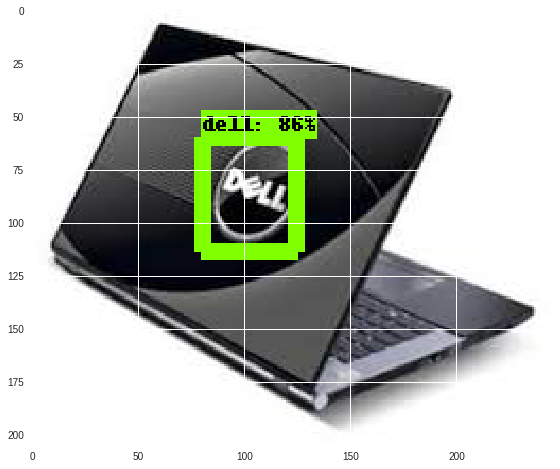

In [0]:
%cd ~/models/research/object_detection




import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# if tf.__version__ < '1.4.0':
#   raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')
  

  
  
# This is needed to display the images.
%matplotlib inline




from utils import label_map_util

from utils import visualization_utils as vis_util




# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/root/datalab/fine_tuned_model' + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/root/datalab', 'label_map.pbtxt')

NUM_CLASSES = 37




detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
    
    
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/root/datalab/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 2) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)




def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict




for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)